In [1]:
##  Import Necessary Libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
##  Load the Dataset

df = pd.read_csv(r"C:\Users\vidhi\OneDrive\Documents\Healthcare Prediction Using ML\Datasets\prepocessed_hypothyroid.csv")  # Ensure the dataset file is present in the same directory
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [3]:
##  Data Preprocessing
print("Columns in dataset:", df.columns.tolist())

target_column = "binaryClass"  

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found. Please check dataset columns: {df.columns.tolist()}")

print("Identified target column:", target_column)

# Replace '?' with NaN for proper handling
df.replace("?", np.nan, inplace=True)

# Check missing values before handling
print("Missing values per column before handling:")
print(df.isnull().sum())

# Drop columns with more than 90% missing values
threshold = 0.9 * len(df)  
df.dropna(thresh=threshold, axis=1, inplace=True)

# Ensure dataset is not fully empty
if df.shape[1] == 0:
    raise ValueError("All columns were dropped due to missing values. Check dataset or lower the missing value threshold.")

# Fill remaining missing values with the most frequent value (mode)
imputer = SimpleImputer(strategy="most_frequent")
df[df.columns] = imputer.fit_transform(df)

# Convert all columns to numeric if needed
df = df.apply(pd.to_numeric, errors='coerce')

# Final dataset check
print("Dataset size after preprocessing:", df.shape)
if df.shape[0] == 0:
    raise ValueError("Dataset is empty after preprocessing. Check missing value handling.")

# Save preprocessed dataset
df.to_csv("preprocessed_hypothyroid.csv", index=False)
print("Preprocessed dataset saved successfully.")

X = df.drop(columns=[target_column])  # Drop the correct target column
y = df[target_column].astype(int)  # Ensure target is a string to match categories

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure no NaN values remain after transformation
if np.isnan(X_train_scaled).sum() > 0 or np.isnan(X_test_scaled).sum() > 0:
    raise ValueError("NaN values still present in the dataset after preprocessing.")

print("Preprocessing completed successfully. Dataset is ready for model training.")


Columns in dataset: ['age', 'sex', 'on thyroxine', 'TSH', 'T3 measured', 'T3', 'TT4', 'binaryClass']
Identified target column: binaryClass
Missing values per column before handling:
age             0
sex             0
on thyroxine    0
TSH             0
T3 measured     0
T3              0
TT4             0
binaryClass     0
dtype: int64
Dataset size after preprocessing: (3772, 8)
Preprocessed dataset saved successfully.
Preprocessing completed successfully. Dataset is ready for model training.


In [4]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# Train, predict and evaluate
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
        


Logistic Regression Accuracy: 0.9576
Decision Tree Accuracy: 0.9934
Random Forest Accuracy: 0.9960
SVM Accuracy: 0.9589
KNN Accuracy: 0.9536


In [5]:

# Save best model and scaler
with open("models/best_thyroid_model.sav", "wb") as f:
    pickle.dump((scaler, best_model), f)
    

print(f"\n✅ Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("📦 Saved to: models/best_thyroid_model.sav")



✅ Best Model: Random Forest with accuracy 0.9960
📦 Saved to: models/best_thyroid_model.sav


C:\Users\vidhi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


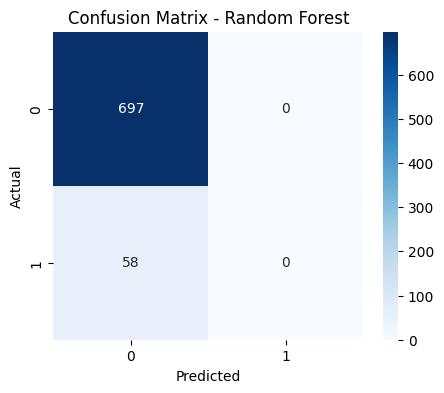

In [6]:
##  Confusion Matrix for Best Model
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
##  Prediction with Best Model
input_data = (1, 45, 0, 1, 2.1, 1.5, 110) 

# Convert input data to numpy array & reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Predict using Best Model
prediction = best_model.predict(input_data_as_numpy_array)

# Display Prediction Result
if prediction[0] == "0":
    print("The Person does not have Thyroid Disease")
else:
    print("The Person has Thyroid Disease")


The Person has Thyroid Disease
